### === Task ===

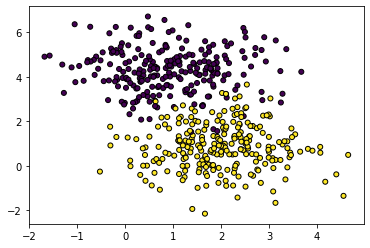

In [1]:
from sklearn import linear_model
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=500, centers=2, n_features=2,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')


1. Put everything into a class called LogisticRegression. The training method should be "minibatch".

2. Perform a classification on the data given above.

3. Plot training losses as number of iters increases.

4. Write a class called classification_report containing 4 functions (Accuracy, Recall, Precision, F1) and use it to evaluate your model.

In [43]:
class LogisticRegression:
    def __init__(self, alpha=0.0001, max_iter=20000):
        self.alpha = alpha
        self.max_iterations = max_iter

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def h_theta(self, X):
        return self.sigmoid(np.dot(X, self.w))

    def predict(self, X_test):
        yhat = np.round(self.sigmoid(X_test @ self.w))
        return yhat

    def gradient(self, X, y):
        h = self.h_theta(X)
        error = h - y
        cost = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        grad = np.dot(X.T, error)
        return cost, grad

    def mini_batch_GD(self, X, y):
        self.costs = []
        self.w = np.ones(X.shape[1])
        batch_size = int(0.1 * X.shape[0])
        for i in range(self.max_iterations):
            ix = np.random.randint(0, X.shape[0])
            batch_X = X[ix:ix + batch_size, :]
            batch_y = y[ix:ix + batch_size]
            cost, grad = self.gradient(batch_X, batch_y)
            self.w = self.w - self.alpha * grad
            if i % 500 == 0:
                print(f"Cost at iteration {i}", cost)
                self.costs.append(cost)
        return self.w, i

    def plot(self):
        print(len(self.costs))
        plt.plot(np.arange(len(self.costs)) , self.costs, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  # add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  # add intercept

Cost at iteration 0 96.99619977712729
Cost at iteration 500 8.24161307241909
Cost at iteration 1000 1.4336190318555402
Cost at iteration 1500 7.418971309353082
Cost at iteration 2000 6.923666547533364
Cost at iteration 2500 3.8797099145270937
Cost at iteration 3000 5.503748668735415
Cost at iteration 3500 4.909243138714076
Cost at iteration 4000 3.0722798625877488
Cost at iteration 4500 0.1041292059675686
Cost at iteration 5000 4.237590174022002
Cost at iteration 5500 4.870401324867047
Cost at iteration 6000 4.4997483354858705
Cost at iteration 6500 2.765136745439617
Cost at iteration 7000 3.232654902504313
Cost at iteration 7500 1.6868313933555898
Cost at iteration 8000 3.3777816030439207
Cost at iteration 8500 8.218432955770451
Cost at iteration 9000 2.6984250282758384
Cost at iteration 9500 3.842714001613755
Cost at iteration 10000 3.0874493945741834
Cost at iteration 10500 2.954112552525169
Cost at iteration 11000 3.920344219048823
Cost at iteration 11500 3.844379539910258
Cost at 

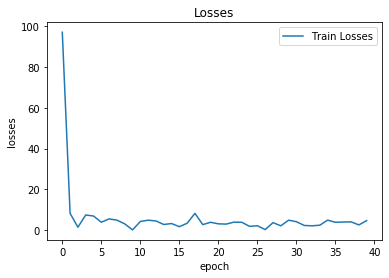

In [46]:
model = LogisticRegression()
model.mini_batch_GD(X_train, y_train)
model.plot()
yhat = model.predict(X_test)